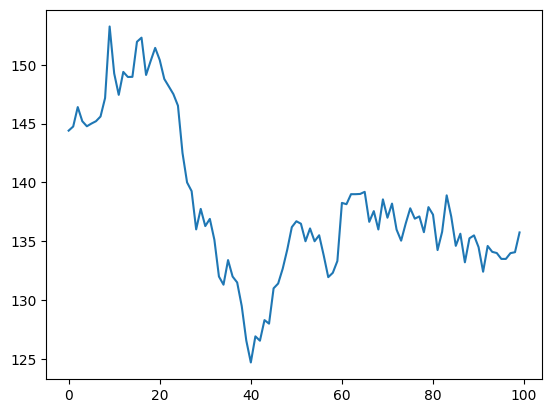

In [ ]:
import pandas as pd
import requests
import csv
from matplotlib import pyplot as plt

# Установка параметров запроса API moex iss
security = 'GAZP'  # Код акции Газпрома
interval = '4' #'24'  # Таймфрейм (24 - дневной таймфрейм, 4 - 4-часовой таймфрейм)

# Формирование URL для получения исторических данных
url = f'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/{security}.json'
params = {
    'iss.meta': 'off',
    'iss.only': 'history',
    'history.columns': 'TRADEDATE,OPEN,HIGH,LOW,CLOSE,VOLUME',
    'interval': interval,
    'from': '10.01.2006', # Дата начала
    'to': '17.04.2024', # Дата окончания
}

# Отправка запроса для получения данных
response = requests.get(url, params=params)
data = response.json()

# Создание списка для сохранения данных
historical_data = []

# Обработка полученных исторических данных
for row in data['history']['data']:
    date = row[0]  # Дата
    open_price = row[1]  # Цена открытия
    high_price = row[2]  # Максимальная цена
    low_price = row[3]  # Минимальная цена
    close_price = row[4]  # Цена закрытия
    volume = row[5]  # Объем торгов

    # Добавление данных в список
    historical_data.append([date, open_price, high_price, low_price, close_price, volume])

# Создание DataFrame с историческими данными
df = pd.DataFrame(historical_data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

plt.plot(list(df['Close']))
plt.savefig("shares.png")

# Сохранение DataFrame в таблицу CSV
df.to_csv('historical_data2.csv', index=False)



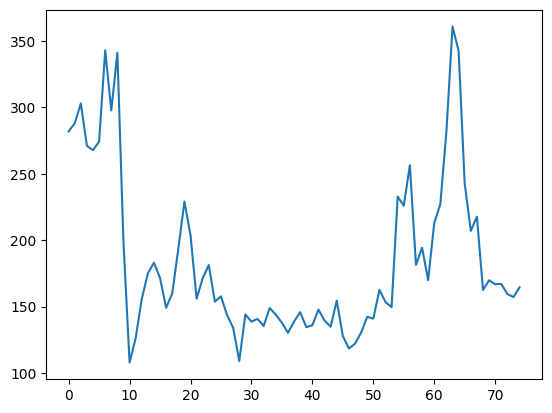

In [ ]:
#годовой график

import pandas as pd
import requests
from matplotlib import pyplot as plt

j = requests.get(
    'http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json?from=2006-01-10&till=2024-04-17&interval=4'
    ).json()
data = [{k : r[i] for i, k in enumerate(j['candles']['columns'])} for r in j['candles']['data']]
frame = pd.DataFrame(data)
frame.to_csv('historical_data3.csv', index=False)
plt.plot(list(frame['close']))
plt.savefig("shares.png")

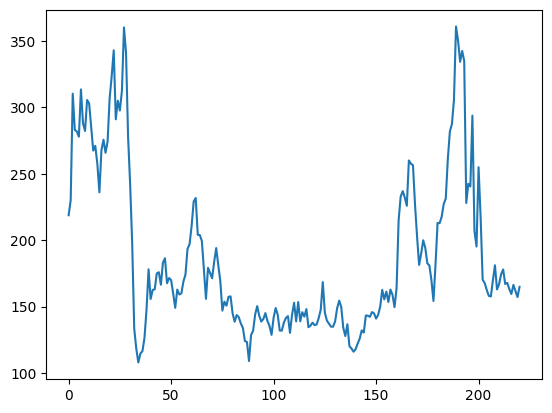

In [ ]:
#месячный график


import pandas as pd
import requests
from matplotlib import pyplot as plt

j = requests.get('http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json?from=2006-01-10&till=2024-04-17&interval=31').json()
data = [{k : r[i] for i, k in enumerate(j['candles']['columns'])} for r in j['candles']['data']]
#frame = pd.DataFrame(data)
# Создание DataFrame с историческими данными
frame = pd.DataFrame(data)

# Сохранение DataFrame в таблицу CSV
frame.to_csv('historical_data4.csv', index=False)
plt.plot(list(frame['close']))
plt.savefig("shares.png")

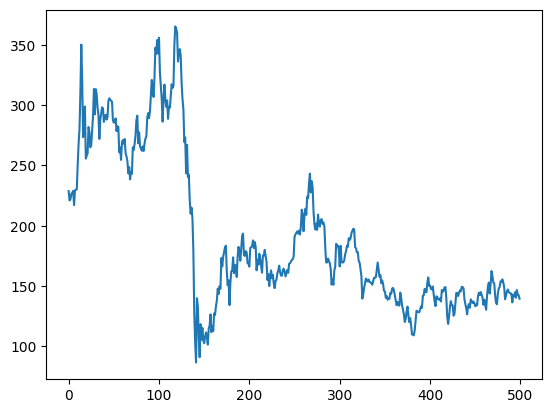

In [ ]:
#1 неделя но только с 2006 до 2016 года (а не до 2024) из-за ограничения в 500 столбцов

import pandas as pd
import requests
from matplotlib import pyplot as plt

j = requests.get('http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json?from=2006-01-10&till=2024-04-17&interval=7').json()
data = [{k : r[i] for i, k in enumerate(j['candles']['columns'])} for r in j['candles']['data']]
#frame = pd.DataFrame(data)
# Создание DataFrame с историческими данными
frame = pd.DataFrame(data)

# Сохранение DataFrame в таблицу CSV
frame.to_csv('historical_data5.csv', index=False)
plt.plot(list(frame['close']))
plt.savefig("shares.png")

In [ ]:
import pandas as pd
import requests
from matplotlib import pyplot as plt

# Функция для получения данных за определенный период
def get_data(from_date, till_date, interval='7'):
    url = 'http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json'
    params = {
        'from': from_date,
        'till': till_date,
        'interval': interval
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return [{k: r[i] for i, k in enumerate(data['candles']['columns'])} for r in data['candles']['data']]
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return []

# Начальная и конечная даты
start_date = '2006-01-10'
end_date = '2024-04-17'

# Интервал
interval = '7'

# Разбиение интервала на части
parts = pd.date_range(start=start_date, end=end_date, freq='1Y')

# Получение данных за каждый период
all_data = []
for i in range(len(parts) - 1):
    from_date = parts[i].strftime('%Y-%m-%d')
    till_date = parts[i + 1].strftime('%Y-%m-%d')
    data = get_data(from_date, till_date, interval)
    all_data.extend(data)

# Создание DataFrame с историческими данными
frame = pd.DataFrame(all_data)

# Сохранение DataFrame в таблицу CSV
frame.to_csv('historical_data_GAZP.csv', index=False)

# Визуализация данных
plt.plot(list(frame['close']))
plt.savefig("shares_GAZP.png")


KeyboardInterrupt: 

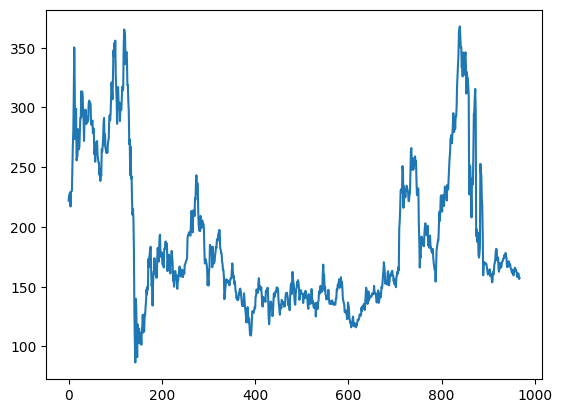

In [ ]:
#НЕДЕЛЬНЫЙ ГРАФИК ПРАВИЛЬНЫЙ


import pandas as pd
import requests
from matplotlib import pyplot as plt

# Функция для получения данных за определенный период
def get_data(from_date, till_date, interval='7'):
    url = 'http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json'
    params = {
        'from': from_date,
        'till': till_date,
        'interval': interval
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return [{k: r[i] for i, k in enumerate(data['candles']['columns'])} for r in data['candles']['data']]
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return []

# Начальная и конечная даты
start_date = '2006-01-10'
end_date = '2024-04-17'

# Интервал
interval = '7'

# Разбиение интервала на части
parts = pd.date_range(start=start_date, end=end_date, freq='1M')

# Получение данных за каждый период
all_data = []
for i in range(len(parts) - 1):
    from_date = parts[i].strftime('%Y-%m-%d')
    till_date = parts[i + 1].strftime('%Y-%m-%d')
    data = get_data(from_date, till_date, interval)
    all_data.extend(data)

# Создание DataFrame с историческими данными
frame = pd.DataFrame(all_data)

# Сохранение DataFrame в таблицу CSV
frame.to_csv('historical_data_GAZP2.csv', index=False)

# Визуализация данных
plt.plot(list(frame['close']))
plt.savefig("shares_GAZP2.png")


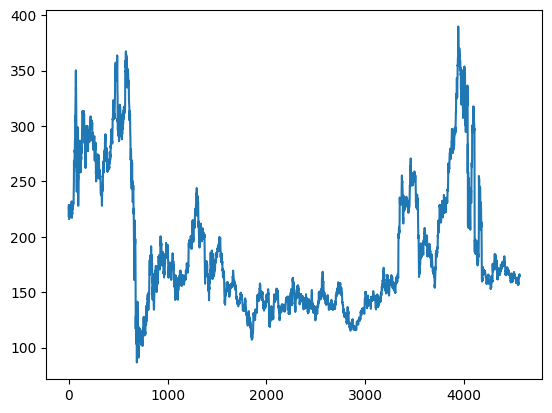

In [ ]:
import pandas as pd
import requests
from matplotlib import pyplot as plt

def get_data(from_date, till_date, interval='24'):
    url = 'http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json'
    params = {
        'from': from_date,
        'till': till_date,
        'interval': interval
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return [{k: r[i] for i, k in enumerate(data['candles']['columns'])} for r in data['candles']['data']]
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return []

start_date = '2006-01-10'
end_date = '2024-04-17'
interval = '24'
parts = pd.date_range(start=start_date, end=end_date, freq='1W')

all_data = []
for i in range(len(parts) - 1):
    from_date = parts[i].strftime('%Y-%m-%d')
    till_date = parts[i + 1].strftime('%Y-%m-%d')
    data = get_data(from_date, till_date, interval)
    all_data.extend(data)

frame = pd.DataFrame(all_data)
frame.to_csv('historical_data_GAZP3.csv', index=False)
plt.plot(list(frame['close']))
plt.savefig("shares_GAZP3.png")

In [ ]:
#ДНЕВНОЙ ГРАФИК ПРАВИЛЬНЫЙ

import pandas as pd
import requests
from matplotlib import pyplot as plt

# Функция для получения данных за определенный период
def get_data(from_date, till_date, interval='24'):
    url = 'http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json'
    params = {
        'from': from_date,
        'till': till_date,
        'interval': interval
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return [{k: r[i] for i, k in enumerate(data['candles']['columns'])} for r in data['candles']['data']]
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return []

# Начальная и конечная даты
start_date = '2006-01-10'
end_date = '2024-04-17'

# Интервал
interval = '24'

# Разбиение интервала на части
parts = pd.date_range(start=start_date, end=end_date, freq='1W')

# Получение данных за каждый период
all_data = []
for i in range(len(parts) - 1):
    from_date = parts[i].strftime('%Y-%m-%d')
    till_date = parts[i + 1].strftime('%Y-%m-%d')
    data = get_data(from_date, till_date, interval)
    all_data.extend(data)

# Создание DataFrame с историческими данными
frame = pd.DataFrame(all_data)

# Сохранение DataFrame в таблицу CSV
frame.to_csv('historical_data_GAZP3.csv', index=False)

# Визуализация данных
plt.plot(list(frame['close']))
plt.savefig("shares_GAZP3.png")

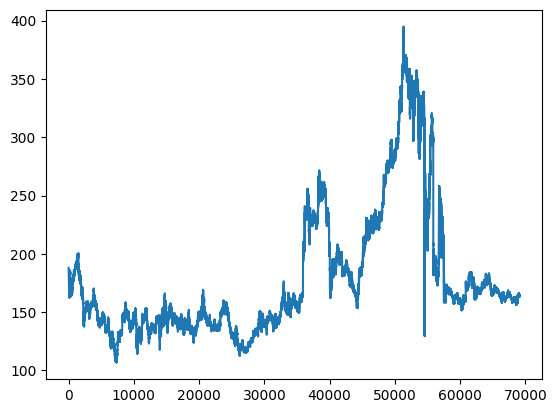

In [ ]:
#часовой ГРАФИК ПРАВИЛЬНЫЙ

import pandas as pd
import requests
from matplotlib import pyplot as plt

# Функция для получения данных за определенный период
def get_data(from_date, till_date, interval='60'):
    url = 'http://iss.moex.com/iss/engines/stock/markets/shares/securities/GAZP/candles.json'
    params = {
        'from': from_date,
        'till': till_date,
        'interval': interval
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return [{k: r[i] for i, k in enumerate(data['candles']['columns'])} for r in data['candles']['data']]
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return []

# Начальная и конечная даты
start_date = '2006-01-10'
end_date = '2024-04-17'

# Интервал
interval = '60'

# Разбиение интервала на части
parts = pd.date_range(start=start_date, end=end_date, freq='1D')

# Получение данных за каждый период
all_data = []
for i in range(len(parts) - 1):
    from_date = parts[i].strftime('%Y-%m-%d')
    till_date = parts[i + 1].strftime('%Y-%m-%d')
    data = get_data(from_date, till_date, interval)
    all_data.extend(data)

# Создание DataFrame с историческими данными
frame = pd.DataFrame(all_data)

# Сохранение DataFrame в таблицу CSV
frame.to_csv('historical_data_GAZP4.csv', index=False)

# Визуализация данных
plt.plot(list(frame['close']))
plt.savefig("shares_GAZP4.png")